## Prison Break: Analysing Helicopter Prison Escape Data

In this work i am going to analyse a dataset of prison escapes where a there have been multiple prison escapes where an inmate escapes by means of a helicopter. (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes).

### This project helps to answer the following questions:

- What year did the most helicopter prison break attempts occur?
- Which of the countries have the most attempted helicopter prison escapees?

In [1]:
#We begin by importing necessary libraries and functions.

import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

In [2]:
#Web scraping function data_from_url() was defined to extract the data
def data_from_url(url,tag_name,class_name):
    response = requests.get(url)
    if response.status_code != 200:
        print('HTTP 404: Page not found')
    else:
        soup = BeautifulSoup(response.text,'html.parser')
        html_output = soup.find(tag_name,{'class':class_name})
        output = pd.read_html(str(html_output))
    return output[0]

In [3]:
#webscrapping the prison break data
data = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

In [4]:
#using the webscrapping function that was created earlier to scrap the neccesary data 
prison_break_data = data_from_url(data,'table','wikitable')

### Data Processing 

In [5]:
for row in prison_break_data[:5]:
    print(row)

Date
Prison name
Country
Succeeded
Escapee(s)
Details


In [6]:
prison_break_data.describe()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
count,48,48,48,48,48,48
unique,48,45,15,2,40,48
top,"August 19, 1971",Luynes prison,France,Yes,—,Joel David Kaplan was a New York businessman w...
freq,1,2,15,34,7,1


All the columns have equal numbers

In [7]:
prison_break_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


In [8]:
prison_break_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In order to calculate which year the most helicopter escapes occurred, the years from the date column need to be extracted and counted, so there is a need to convert the role columns using the pandas datetime format to ease the analysis

In [9]:
prison_break_data['Date'] = pd.to_datetime(prison_break_data.Date)

prison_break_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


#### In order to answer the first question which is to check the year the most helicopter prison break attempts occurs, i extracted the year and made another column off it

In [10]:
prison_break_data['Year'] = pd.DatetimeIndex(prison_break_data['Date']).year

In [11]:
prison_break_data['Month'] = pd.DatetimeIndex(prison_break_data['Date']).month

In [12]:
import calendar
prison_break_data['Month'] = prison_break_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [13]:
prison_break_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details,Year,Month
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...,1971,Aug
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h...",1973,Oct
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...,1978,May
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an...",1981,Feb
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...,1981,May


In [14]:
prison_break_data['Month'].value_counts()

Jan    7
Dec    7
Jun    6
Jul    5
May    4
Feb    4
Mar    4
Apr    3
Aug    2
Oct    2
Nov    2
Sep    2
Name: Month, dtype: int64

## Data Visualization

### Answering the questions by producing bar plots.

<AxesSubplot:title={'center':'Prison Breaks Per Year'}, xlabel='Year', ylabel='No. of Escapes'>

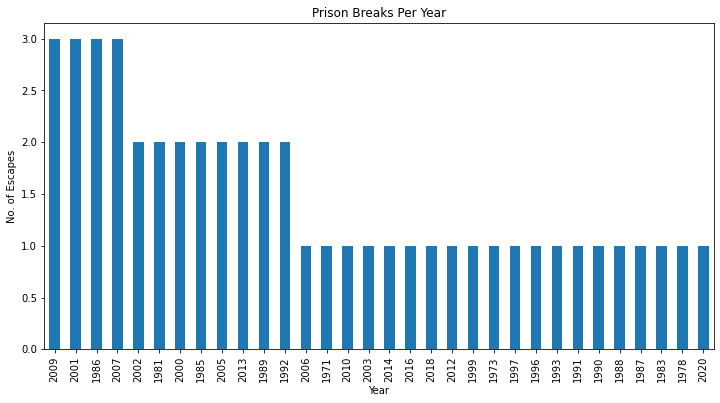

In [15]:
prison_break_data['Year'].value_counts().plot(kind='bar' ,  xlabel = 'Year', ylabel = 'No. of Escapes',title = 'Prison Breaks Per Year',figsize = (12,6))

#### Answering the second question which is the countries have the most attempted helicopter prison escapees

<AxesSubplot:title={'center':'Prison Breaks per Country'}, xlabel='Country', ylabel='No. of Escapes'>

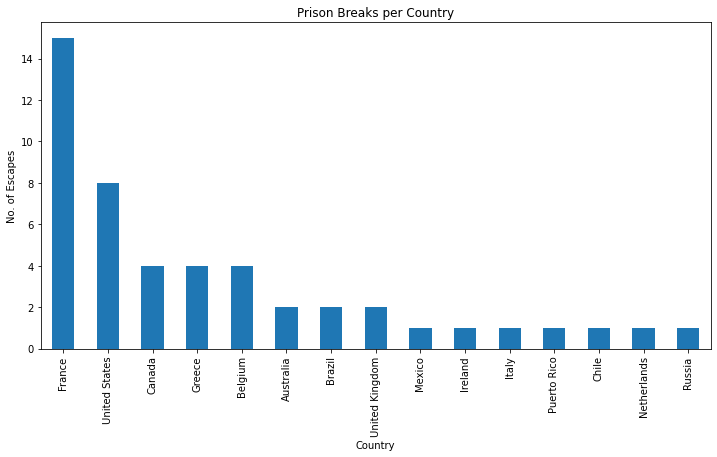

In [16]:
prison_break_data['Country'].value_counts().plot(kind='bar' , xlabel = 'Country',ylabel = 'No. of Escapes',title = 'Prison Breaks per Country',figsize = (12,6))

<AxesSubplot:title={'center':'Prison Breaks Per Month'}, xlabel='Year', ylabel='No. of Escapes'>

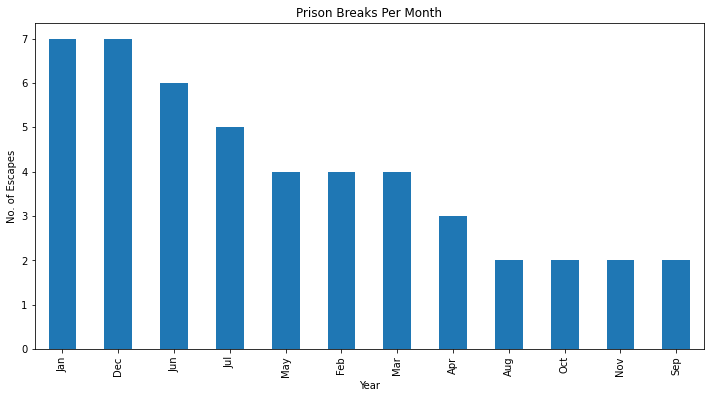

In [17]:
prison_break_data['Month'].value_counts().plot(kind='bar' ,  xlabel = 'Year', ylabel = 'No. of Escapes',title = 'Prison Breaks Per Month',figsize = (12,6))

### It can be concluded that there has been a maximum of three recorded prison escapes by helicopter in one year. This has happened during years 1986, 2001, 2007 & 2009 and France recorded more than 14 recorded prison escapes by helicopter, more than any other country on record, the month of January, December and June also recorded more attempt

## Checking the year they're most successful

In [18]:
df_succeeded=prison_break_data[prison_break_data['Succeeded']=='Yes']

In [19]:
print(tabulate(df_succeeded['Year'].value_counts(dropna=False).to_frame().head(5),
              headers=[f'\033[31mYear\033[0m', '\033[31mNumber of attempts(succeeded)\033[0m'], tablefmt='fancy_grid'))

╒════════╤═════════════════════════════════╕
│   Year │   Number of attempts(succeeded) │
╞════════╪═════════════════════════════════╡
│   1986 │                               3 │
├────────┼─────────────────────────────────┤
│   2009 │                               3 │
├────────┼─────────────────────────────────┤
│   2001 │                               2 │
├────────┼─────────────────────────────────┤
│   1985 │                               2 │
├────────┼─────────────────────────────────┤
│   2007 │                               2 │
╘════════╧═════════════════════════════════╛


#### Helicopter escape were more succesful in the year 1986 and 2009 than other years 

In [20]:
print(tabulate(df_succeeded['Month'].value_counts(dropna=False).to_frame().head(5),
              headers=[f'\033[31mMonth\033[0m', '\033[31mNumber of attempts(succeeded)\033[0m'], tablefmt='fancy_grid'))

╒═════════╤═════════════════════════════════╕
│ Month   │   Number of attempts(succeeded) │
╞═════════╪═════════════════════════════════╡
│ Dec     │                               6 │
├─────────┼─────────────────────────────────┤
│ Jan     │                               6 │
├─────────┼─────────────────────────────────┤
│ Jul     │                               4 │
├─────────┼─────────────────────────────────┤
│ Jun     │                               4 │
├─────────┼─────────────────────────────────┤
│ Mar     │                               4 │
╘═════════╧═════════════════════════════════╛


#### Helicopter escape were more successful in the month of December and January than other years 

In [21]:
df_failed=prison_break_data[prison_break_data['Succeeded']=='No']

print(tabulate(df_failed['Year'].value_counts(dropna=False).to_frame().head(5),
              headers=[f'\033[31mYear\033[0m', '\033[31mNumber of attempts(failed)\033[0m'], tablefmt='fancy_grid'))

╒════════╤══════════════════════════════╕
│   Year │   Number of attempts(failed) │
╞════════╪══════════════════════════════╡
│   1978 │                            1 │
├────────┼──────────────────────────────┤
│   1981 │                            1 │
├────────┼──────────────────────────────┤
│   1983 │                            1 │
├────────┼──────────────────────────────┤
│   1989 │                            1 │
├────────┼──────────────────────────────┤
│   1992 │                            1 │
╘════════╧══════════════════════════════╛


In [22]:
print(tabulate(df_failed['Month'].value_counts(dropna=False).to_frame().head(5),
              headers=[f'\033[31mMonth\033[0m', '\033[31mNumber of attempts(failed)\033[0m'], tablefmt='fancy_grid'))

╒═════════╤══════════════════════════════╕
│ Month   │   Number of attempts(failed) │
╞═════════╪══════════════════════════════╡
│ May     │                            3 │
├─────────┼──────────────────────────────┤
│ Jun     │                            2 │
├─────────┼──────────────────────────────┤
│ Sep     │                            2 │
├─────────┼──────────────────────────────┤
│ Feb     │                            2 │
├─────────┼──────────────────────────────┤
│ Jan     │                            1 │
╘═════════╧══════════════════════════════╛


#### Helicopter escape were more succesful in the month of May